In [1]:
import os
from glob import glob
import pandas as pd 
import matplotlib.pyplot as plt

resultRoot = "/home/ubuntu/veg-co-validate/"

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
results = glob(os.path.join(resultRoot, "*/*/*_merged.tif"))

In [ ]:
#/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172329_0f51_3B_AnalyticMS_SR_clip/data-mask.geojson

In [3]:
results

['/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172329_0f51_3B_AnalyticMS_SR_clip/preds/20180524_172329_0f51_3B_AnalyticMS_SR_clip_merged.tif',
 '/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172329_0f51_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif',
 '/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172147_103d_3B_AnalyticMS_SR_clip/preds/20180524_172147_103d_3B_AnalyticMS_SR_clip_merged.tif',
 '/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172147_103d_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif',
 '/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-

In [8]:
# separate into ASOs

asoS =  glob(os.path.join(resultRoot, "*/*/ASO_*_merged.tif"))
#separate into Preds
predS = glob(os.path.join(resultRoot, "*/*/20180524_*_merged.tif"))

In [9]:
predS

['/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172329_0f51_3B_AnalyticMS_SR_clip/preds/20180524_172329_0f51_3B_AnalyticMS_SR_clip_merged.tif',
 '/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172147_103d_3B_AnalyticMS_SR_clip/preds/20180524_172147_103d_3B_AnalyticMS_SR_clip_merged.tif',
 '/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172326_0f51_3B_AnalyticMS_SR_clip/preds/20180524_172326_0f51_3B_AnalyticMS_SR_clip_merged.tif',
 '/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172327_0f51_3B_AnalyticMS_SR_clip/preds/20180524_172327_0f51_3B_AnalyticMS_SR_clip_merged.tif',
 '/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcove

In [10]:
# List for the source files
src_files_to_mosaic = []

# Iterate over raster files and add them to source -list in 'read mode'
for fp in predS:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)

src_files_to_mosaic


[<open DatasetReader name='/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172329_0f51_3B_AnalyticMS_SR_clip/preds/20180524_172329_0f51_3B_AnalyticMS_SR_clip_merged.tif' mode='r'>,
 <open DatasetReader name='/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172147_103d_3B_AnalyticMS_SR_clip/preds/20180524_172147_103d_3B_AnalyticMS_SR_clip_merged.tif' mode='r'>,
 <open DatasetReader name='/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172326_0f51_3B_AnalyticMS_SR_clip/preds/20180524_172326_0f51_3B_AnalyticMS_SR_clip_merged.tif' mode='r'>,
 <open DatasetReader name='/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172327_0f51_3B_AnalyticMS_SR_clip/pred

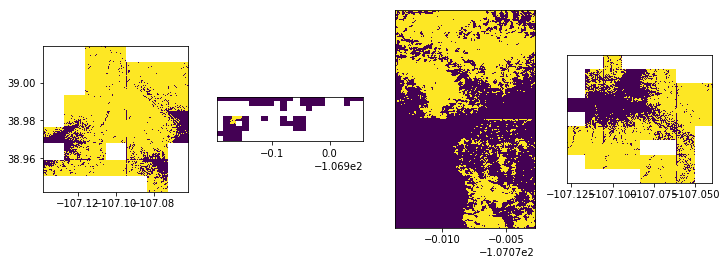

In [12]:

import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

# Create 4 plots next to each other
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(12, 4))

# Plot first four files
show(src_files_to_mosaic[0], ax=ax1)
show(src_files_to_mosaic[1], ax=ax2)
show(src_files_to_mosaic[2], ax=ax3)
show(src_files_to_mosaic[3], ax=ax4)

# Do not show y-ticks values in last three axis
for ax in [ax2, ax3, ax4]:
    ax.yaxis.set_visible(False)

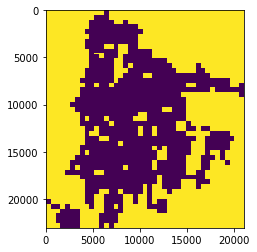

In [14]:
# Merge function returns a single mosaic array and the transformation info
mosaic, out_trans = merge(src_files_to_mosaic)

# Plot the result
show(mosaic)

In [15]:
# List for the source files
aso_files_to_mosaic = []

# Iterate over raster files and add them to source -list in 'read mode'
for fp in asoS:
    src = rasterio.open(fp)
    aso_files_to_mosaic.append(src)

aso_files_to_mosaic


[<open DatasetReader name='/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172329_0f51_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif' mode='r'>,
 <open DatasetReader name='/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172147_103d_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif' mode='r'>,
 <open DatasetReader name='/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172326_0f51_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif' mode='r'>,
 <open DatasetReader name='/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172327_0f51_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary

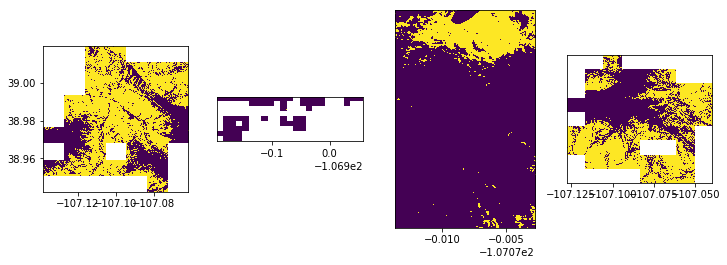

In [16]:

%matplotlib inline

# Create 4 plots next to each other
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(12, 4))

# Plot first four files
show(aso_files_to_mosaic[0], ax=ax1)
show(aso_files_to_mosaic[1], ax=ax2)
show(aso_files_to_mosaic[2], ax=ax3)
show(aso_files_to_mosaic[3], ax=ax4)

# Do not show y-ticks values in last three axis
for ax in [ax2, ax3, ax4]:
    ax.yaxis.set_visible(False)

In [23]:
from osgeo import gdal
outvrt = 'gunnison_stacked.vrt' #/vsimem is special in-memory virtual "directory"
outtif = 'gunnison_stacked.tif'
translateoptions = gdal.TranslateOptions(gdal.ParseCommandLine("-of Gtiff -co COMPRESS=LZW"))

outds = gdal.BuildVRT(outvrt, asoS, separate=True)
outds = gdal.Translate(outtif, outds, options=translateoptions)

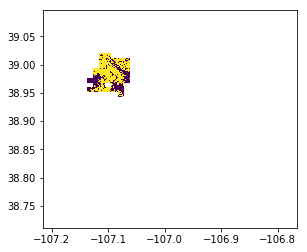

In [19]:
# Plot first four files
show(rasterio.open(outtif))

In [22]:
from osgeo import gdal
predoutvrt = 'gunnison_pred_stacked.vrt' #/vsimem is special in-memory virtual "directory"
predouttif = 'gunnison_pred_stacked.tif'
predoutds = gdal.BuildVRT(predoutvrt, predS, separate=True)
translateoptions = gdal.TranslateOptions(gdal.ParseCommandLine("-of Gtiff -co COMPRESS=LZW"))
predoutds = gdal.Translate(predouttif, predoutds, options=translateoptions)

In [133]:
from shapely.geometry import mapping
from rasterio.mask import mask
import json
geojson='/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172329_0f51_3B_AnalyticMS_SR_clip/data-mask.geojson'

cut_by_geojson(predouttif,'gunnison_pred_stacked_clipped.tif',geojson)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [131]:
!gdalinfo gunnison_pred_stacked.tif

Driver: GTiff/GeoTIFF
Files: gunnison_pred_stacked.tif
Size is 20992, 23037
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (-107.215576171875000,39.095962936305483)
Pixel Size = (0.000021457672119,-0.000016700378284)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=PIXEL
Corner Coordinates:
Upper Left  (-107.2155762,  39.0959629) (107d12'56.07"W, 39d 5'45.47"N)
Lower Left  (-107.2155762,  38.7112363) (107d12'56.07"W, 38d42'40.45"N)
Upper Right (-106.7651367,  39.0959629) (106d45'54.49"W, 39d 5'45.47"N)
Lower Right (-106.7651367,  38.7112363) (106d45'54.49"W, 38d42'40.45"N)
Center      (-106.9903564,  38.9035996) (106d59'25.28"W, 38d54'12.96"N)
Band 1 Block=20992x1 Type=Int16, ColorInterp=Gray
  NoData Value=99

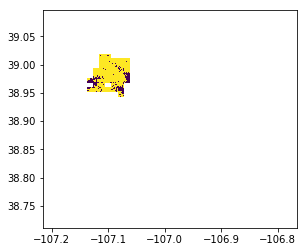

In [21]:
# Plot first four files
show(rasterio.open(predouttif))

In [25]:
aso_files_to_mosaic[0]

<open DatasetReader name='/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172329_0f51_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif' mode='r'>

In [47]:
mask_data = aso_files_to_mosaic[0].read(1).flatten()
pred_data = src_files_to_mosaic[0].read(1).flatten()
print(mask_data.shape, pred_data.shape)
# remove nodata
try:
        mask_data = mask_data[np.where(mask_data != 9999)]
        pred_data = pred_data[np.where(pred_data != 9999)]
except Exception as e:
        print("Error filtering nodata. Do input data files have nodata attribute set? [{}]".format(e))
print(mask_data.shape, pred_data.shape)        

(16511488,) (16518656,)
(11010560,) (11013120,)


In [48]:
from glob import glob
from sklearn import metrics
import json

compare = (mask_data, pred_data)

balanced_acc = metrics.balanced_accuracy_score(*compare)
prfs = metrics.precision_recall_fscore_support(*compare, average='binary')

these_metrics = {
        "balanced_accuracy" : balanced_acc,
        "precision": prfs[0],
        "recall": prfs[1],
        "f_score": prfs[2]
    }

ValueError: Found input variables with inconsistent numbers of samples: [11010560, 11013120]

In [43]:
predS[0]

'/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172329_0f51_3B_AnalyticMS_SR_clip/preds/20180524_172329_0f51_3B_AnalyticMS_SR_clip_merged.tif'

In [108]:
from shapely.geometry import mapping
from rasterio.mask import mask
import json
geojson='/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172329_0f51_3B_AnalyticMS_SR_clip/data-mask.geojson'
with open(geojson) as data_file:
     geoms= json.loads(data_file.read())
all_bounds = [geoms]        
with rasterio.open(predS[0]) as src:
    out_image, out_transform = mask(src, all_bounds, crop=True) 
    out_meta = src.meta.copy()
    ## Re-arrange bounding box to plot
    bounds = (src.bounds.left, src.bounds.right, \
          src.bounds.bottom, src.bounds.top)
    # save the resulting raster
    out_meta.update({"driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform})
    print('pred')
    print(src.profile)
    with rasterio.open( "preds_clipped.tif", "w", **out_meta) as dest:
            dest.write(out_image) 
with rasterio.open(asoS[0]) as src:
    out_image, out_transform = mask(src, all_bounds, crop=True) 
    out_meta = src.meta.copy()

    # save the resulting raster
    out_meta.update({"driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform})
    print('mask')
    print(src.profile)
    with rasterio.open( "asos_clipped.tif", "w", **out_meta) as dest:
            dest.write(out_image)             

pred
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 9999.0, 'width': 3584, 'height': 4609, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(2.1457672119140625e-05, 0.0, -107.138671875,
       0.0, -1.6678264160907563e-05, 39.01918369029135), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}
mask
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 9999.0, 'width': 3584, 'height': 4607, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(2.1457672119140625e-05, 0.0, -107.138671875,
       0.0, -1.668429992519871e-05, 39.01918369029135), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


In [70]:
bounds

(-107.138671875, -107.061767578125, 38.94231357077373, 39.01918369029135)

In [60]:
mask_data = rasterio.open("asos_clipped.tif").read(1).flatten()
pred_data = rasterio.open("preds_clipped.tif").read(1).flatten()
print(mask_data.shape, pred_data.shape)
# remove nodata
try:
        mask_data = mask_data[np.where(mask_data != 9999)]
        pred_data = pred_data[np.where(pred_data != 9999)]
except Exception as e:
        print("Error filtering nodata. Do input data files have nodata attribute set? [{}]".format(e))
print(mask_data.shape, pred_data.shape) 

(16511488,) (16518656,)
(11007488,) (11010560,)


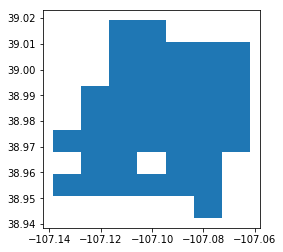

In [65]:
import geopandas as gpd

lsoas = gpd.read_file(geojson)
lsoas.head()
lsoas.plot()

In [68]:
## Re-arrange bounding box to plot
bounds = (source.bounds.left, source.bounds.right, \
          source.bounds.bottom, source.bounds.top)
## Stack RGB values into a single array
pix = np.dstack(rasterio.open("preds_clipped.tif").read(1))

In [73]:
pix

array([[[9999, 9999, 9999, ..., 9999, 9999, 9999],
        [9999, 9999, 9999, ..., 9999, 9999, 9999],
        [9999, 9999, 9999, ..., 9999, 9999, 9999],
        ...,
        [9999, 9999, 9999, ..., 9999, 9999, 9999],
        [9999, 9999, 9999, ..., 9999, 9999, 9999],
        [9999, 9999, 9999, ..., 9999, 9999, 9999]]], dtype=int16)

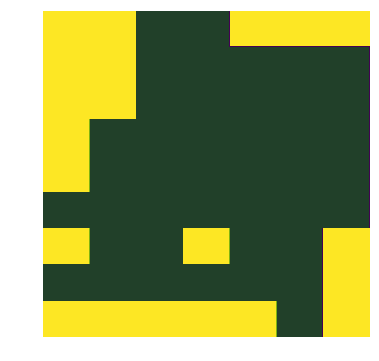

In [77]:

# Set up figure
f, ax = plt.subplots(figsize=(6, 6))
# Add raster
ax.imshow(rasterio.open("preds_clipped.tif").read(1), extent=bounds)
# Extract limits from Liverpool from LSOAs
w, s, e, n = lsoas.total_bounds
# Center figure on Liverpool limits
ax.set_xlim((w, e))
ax.set_ylim((s, n))
# Add polygon layer
lsoas.plot(ax=ax, alpha=0.5, color='green', linewidth=3)
# Remove axis
plt.axis('off')
# Display figure
plt.show()

In [82]:
out_image.shape

(1, 4607, 3584)

In [84]:
type(out_image)

numpy.ndarray

In [88]:
# no data values of the original raster
no_data=src.nodata
print (no_data)
# extract the values of the masked array
data = out_image[0]
# extract the row, columns of the valid values

row, col = np.where(data != no_data) 
snow = np.extract(data != no_data, data)

9999.0


In [89]:
from rasterio import Affine # or from affine import Affine
T1 = out_transform * Affine.translation(0.5, 0.5) # reference the pixel centre
rc2xy = lambda r, c: (c, r) * T1  

In [90]:
d = gpd.GeoDataFrame({'col':col,'row':row,'snow':snow})
# coordinate transformation
d['x'] = d.apply(lambda row: rc2xy(row.row,row.col)[0], axis=1)
d['y'] = d.apply(lambda row: rc2xy(row.row,row.col)[1], axis=1)
# geometry
from shapely.geometry import Point
d['geometry'] =d.apply(lambda row: Point(row['x'], row['y']), axis=1)
# first 2 points
d.head(2)

,col,row,snow,x,y,geometry
0,1024,0,1,-107.116688,39.019175,POINT (-107.11669 39.01918)
1,1025,0,1,-107.116667,39.019175,POINT (-107.11667 39.01918)


In [93]:
type(d)

geopandas.geodataframe.GeoDataFrame

In [117]:
import geopandas as gp
from rasterio.features import shapes
with rasterio.open('asos_clipped.tif') as msk:
    with rasterio.open('preds_clipped.tif') as src:        
        aso = msk.read(1)  ## first and only band      
        pred = src.read(1)   ## first and only band
        #print('mask',msk.profile)
        #print('pred', src.profile)
        out_profile = msk.profile.copy()
        print(out_profile)
        out_affine = out_profile.pop("transform")
        out_profile["transform"] = out_affine

        # then, write the output raster
        output='preds_clipped_matched.tif'
        with rasterio.open(output, 'w', **out_profile) as dst:
            dst.write(pred)



{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 9999.0, 'width': 3584, 'height': 4607, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(2.1457672119140625e-05, 0.0, -107.138671875,
       0.0, -1.668429992519871e-05, 39.01918369029135), 'tiled': False, 'interleave': 'band'}


ValueError: Source shape (4609, 3584) is inconsistent with given indexes 1

In [105]:
thisGeoData.head(2)

,geometry,altitude
0,"POLYGON ((-107.11627 39.01918, -107.11627 39.0...",0.0
1,"POLYGON ((-107.11593 39.01918, -107.11593 39.0...",0.0


In [119]:
scale=1
from rasterio.enums import Resampling
# Open data and assign negative values to nan
with rio.open('preds_clipped.tif') as origin:
        with rio.open('asos_clipped.tif') as src:
            t = src.transform
            # # Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
           # planet_ndvi = es.normalized_diff(src.read(3), src.read(4))
            # rescale the metadata
            transform = Affine(t.a * scale, t.b, t.c, t.d, t.e * scale, t.f)
            height = int(src.height / scale)
            width = int(src.width / scale)

            profile = origin.profile
            profile.update(transform=transform,
                           driver='GTiff', 
                           height=height, width=width)

            #data = raster.read(
            #        out_shape=(origin.count, height, width),
            #        resampling=Resampling.bilinear,
            #    )
            data = origin.read(
                    out_shape=(origin.count, height, width),
                    resampling=Resampling.bilinear,
            )
            with rasterio.open('preds_clipped_matched.tif', 'w', **profile) as dataset:  # Open as DatasetWriter
                dataset.write(data)

In [106]:
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [128]:
stack_band_paths= ["asos_clipped.tif","preds_clipped_matched.tif"]
raster_out_path = os.path.join('.', "raster.tiff")
array, raster_prof = es.stack(stack_band_paths, out_path=raster_out_path)

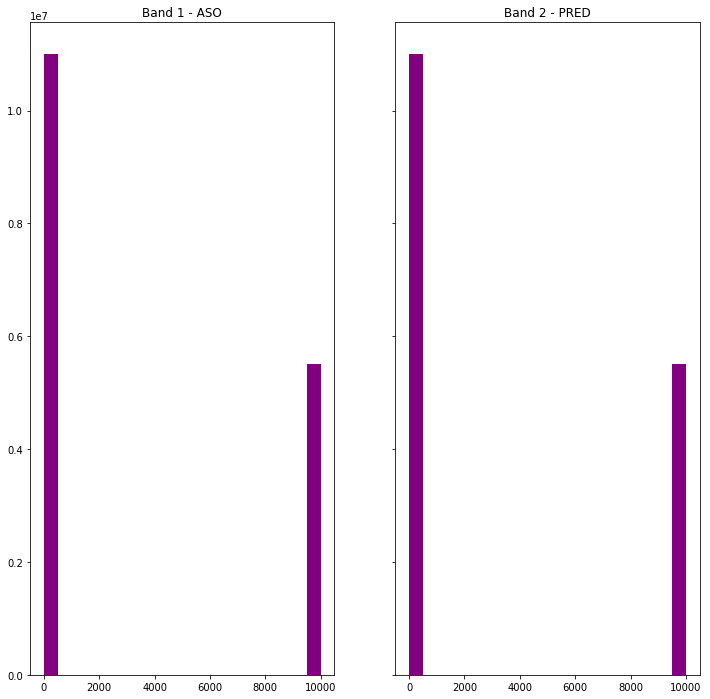

In [129]:
# View hist of data with nodata values removed
ep.hist(
    array,
    title=[
        "Band 1 - ASO",
        "Band 2 - PRED"
    ],
)
plt.show()

# Recreate extent object for the No Data array

extent_nodata = plotting_extent(
    array[0], raster_prof["transform"]
)

In [130]:
from glob import glob
from sklearn import metrics
import json

mask_data = array[0][np.where(array[0] != 9999)]
pred_data = array[1][np.where(array[1] != 9999)]
        
compare = (mask_data, pred_data)

balanced_acc = metrics.balanced_accuracy_score(*compare)
prfs = metrics.precision_recall_fscore_support(*compare, average='binary')

these_metrics = {
        "balanced_accuracy" : balanced_acc,
        "precision": prfs[0],
        "recall": prfs[1],
        "f_score": prfs[2]
    }

ValueError: Found input variables with inconsistent numbers of samples: [11007488, 11010560]

In [124]:
array

masked_array(
  data=[[[9999, 9999, 9999, ..., 9999, 9999, 9999],
         [9999, 9999, 9999, ..., 9999, 9999, 9999],
         [9999, 9999, 9999, ..., 9999, 9999, 9999],
         ...,
         [9999, 9999, 9999, ..., 9999, 9999, 9999],
         [9999, 9999, 9999, ..., 9999, 9999, 9999],
         [9999, 9999, 9999, ..., 9999, 9999, 9999]],

        [[9999, 9999, 9999, ..., 9999, 9999, 9999],
         [9999, 9999, 9999, ..., 9999, 9999, 9999],
         [9999, 9999, 9999, ..., 9999, 9999, 9999],
         ...,
         [9999, 9999, 9999, ..., 9999, 9999, 9999],
         [9999, 9999, 9999, ..., 9999, 9999, 9999],
         [9999, 9999, 9999, ..., 9999, 9999, 9999]]],
  mask=False,
  fill_value=-9999,
  dtype=int16)

In [61]:
import geojson as gj
from osgeo import ogr, osr, gdal

# Enable GDAL/OGR exceptions
gdal.UseExceptions()


# GDAL & OGR memory drivers
GDAL_MEMORY_DRIVER = gdal.GetDriverByName('MEM')
OGR_MEMORY_DRIVER = ogr.GetDriverByName('Memory')


def cut_by_geojson(input_file, output_file, shape_geojson):

    # Get coords for bounding box
    x, y = zip(*gj.utils.coords(gj.loads(shape_geojson)))
    min_x, max_x, min_y, max_y = min(x), max(x), min(y), max(y)

    # Open original data as read only
    dataset = gdal.Open(input_file, gdal.GA_ReadOnly)

    bands = dataset.RasterCount

    # Getting georeference info
    transform = dataset.GetGeoTransform()
    projection = dataset.GetProjection()
    xOrigin = transform[0]
    yOrigin = transform[3]
    pixelWidth = transform[1]
    pixelHeight = -transform[5]

    # Getting spatial reference of input raster
    srs = osr.SpatialReference()
    srs.ImportFromWkt(projection)

    # WGS84 projection reference
    OSR_WGS84_REF = osr.SpatialReference()
    OSR_WGS84_REF.ImportFromEPSG(4326)

    # OSR transformation
    wgs84_to_image_trasformation = osr.CoordinateTransformation(OSR_WGS84_REF,
                                                                srs)
    XYmin = wgs84_to_image_trasformation.TransformPoint(min_x, max_y)
    XYmax = wgs84_to_image_trasformation.TransformPoint(max_x, min_y)

    # Computing Point1(i1,j1), Point2(i2,j2)
    i1 = int((XYmin[0] - xOrigin) / pixelWidth)
    j1 = int((yOrigin - XYmin[1]) / pixelHeight)
    i2 = int((XYmax[0] - xOrigin) / pixelWidth)
    j2 = int((yOrigin - XYmax[1]) / pixelHeight)
    new_cols = i2 - i1 + 1
    new_rows = j2 - j1 + 1

    # New upper-left X,Y values
    new_x = xOrigin + i1 * pixelWidth
    new_y = yOrigin - j1 * pixelHeight
    new_transform = (new_x, transform[1], transform[2], new_y, transform[4],
                     transform[5])

    wkt_geom = ogr.CreateGeometryFromJson(str(shape_geojson))
    wkt_geom.Transform(wgs84_to_image_trasformation)

    target_ds = GDAL_MEMORY_DRIVER.Create('', new_cols, new_rows, 1,
                                          gdal.GDT_Byte)
    target_ds.SetGeoTransform(new_transform)
    target_ds.SetProjection(projection)

    # Create a memory layer to rasterize from.
    ogr_dataset = OGR_MEMORY_DRIVER.CreateDataSource('shapemask')
    ogr_layer = ogr_dataset.CreateLayer('shapemask', srs=srs)
    ogr_feature = ogr.Feature(ogr_layer.GetLayerDefn())
    ogr_feature.SetGeometryDirectly(ogr.Geometry(wkt=wkt_geom.ExportToWkt()))
    ogr_layer.CreateFeature(ogr_feature)

    gdal.RasterizeLayer(target_ds, [1], ogr_layer, burn_values=[1],
                        options=["ALL_TOUCHED=TRUE"])

    # Create output file
    driver = gdal.GetDriverByName('GTiff')
    outds = driver.Create(output_file, new_cols, new_rows, bands,
                          gdal.GDT_Float32)

    # Read in bands and store all the data in bandList
    mask_array = target_ds.GetRasterBand(1).ReadAsArray()
    band_list = []

    for i in range(bands):
        band_list.append(dataset.GetRasterBand(i + 1).ReadAsArray(i1, j1,
                         new_cols, new_rows))

    for j in range(bands):
        data = np.where(mask_array == 1, band_list[j], mask_array)
        outds.GetRasterBand(j + 1).SetNoDataValue(0)
        outds.GetRasterBand(j + 1).WriteArray(data)

    outds.SetProjection(projection)
    outds.SetGeoTransform(new_transform)

    target_ds = None
    dataset = None
    outds = None
    ogr_dataset = None

/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172329_0f51_3B_AnalyticMS_SR_clip/preds/20180524_172329_0f51_3B_AnalyticMS_SR_clip_merged.tif
[[9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 ...
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]]


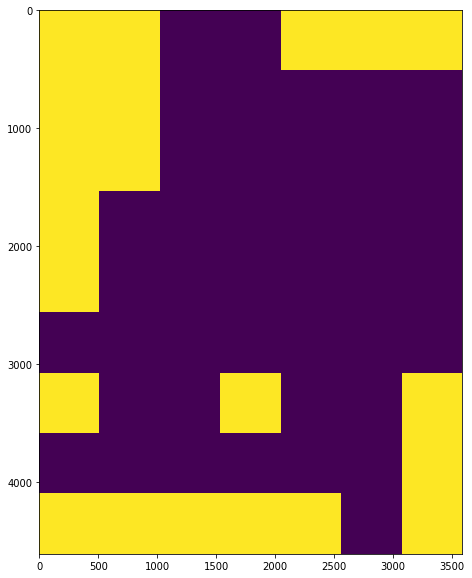

In [4]:
%matplotlib inline
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt
print(results[0])
# Load the DEM and read out a np array of the elevation values (meters):
dem = rio.open(results[0])
elev = dem.read(1)
print(elev)


# Plot this elevation band:
plt.figure(figsize=(10,10))
plt.imshow(elev)

title_text = ''
plt.title(title_text);

/home/ubuntu/veg-co-validate/planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180524_172329_0f51_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCOGE_20180524_binary_merged.tif
[[9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 ...
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]
 [9999 9999 9999 ... 9999 9999 9999]]


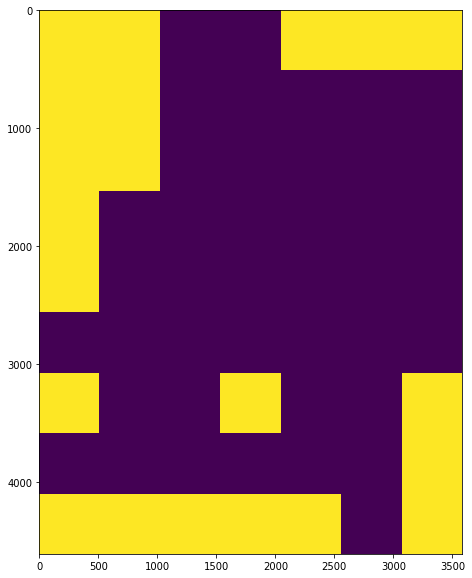

In [5]:
%matplotlib inline
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os
from datetime import datetime as dt
print(results[1])
# Load the DEM and read out a np array of the elevation values (meters):
dem = rio.open(results[1])
elev = dem.read(1)
print(elev)


# Plot this elevation band:
plt.figure(figsize=(10,10))
plt.imshow(elev)

title_text = ''
plt.title(title_text);